## Base de Dados - Machine Learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
SEED = 5
np.random.seed(SEED)

In [4]:
dados = pd.read_json('../Dados/df_para_ml.json')
dados.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,fl_servico_seguranca_online,...,fl_servico_internet_dsl,fl_servico_internet_fibra_otica,fl_sem_servico_internet,fl_contrato_anual,fl_contrato_bienal,fl_contrato_mensal,fl_pagamento_ccredito,fl_pagamento_cheque_correio,fl_pagamento_cheque_eletronico,fl_pagamento_transf_bancaria
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,0,...,1,0,0,0,0,1,0,1,0,0
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,0,...,0,1,0,0,0,1,0,1,0,0


### Verificar se a variável target está balanceada

In [5]:
dados.fl_inativo.value_counts()

0    5174
1    1869
Name: fl_inativo, dtype: int64

In [6]:
dados.fl_inativo.value_counts(normalize=True) * 100

0    73.463013
1    26.536987
Name: fl_inativo, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

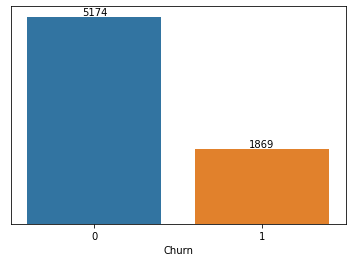

In [7]:
ax = sns.countplot(x='fl_inativo', data=dados)
ax.get_yaxis().set_visible(False)
plt.xlabel('Churn')
ax.bar_label(container = ax.containers[0])

Temos que 73% da base está classificada como 0 (não churn) apresentando um desbalanceamento

#### Balancendo os dados

In [8]:
from imblearn.over_sampling import SMOTE

Separando X e y

Não irei considerar a variável sexo pois entendi que não relação com o churn, seja por modelo de negócio ou correlação da base

In [9]:
x = dados.drop(columns=['id_cliente', 'sexo', 'valor_servico_diario', 'fl_inativo'])
y = dados.fl_inativo

In [10]:
smote = SMOTE(random_state=SEED)

[SMOTE.fit_resample](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE.fit_resample)

In [11]:
dados.shape

(7043, 29)

In [12]:
x_resample, y_resample = smote.fit_resample(x, y)

In [13]:
df_balanced = pd.merge(left=y_resample, right=x_resample, left_index=True, right_index=True)
df_balanced.head()

,fl_inativo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,fl_servico_seguranca_online,fl_servico_backup_online,fl_servico_protecao_dispositivo,...,fl_servico_internet_dsl,fl_servico_internet_fibra_otica,fl_sem_servico_internet,fl_contrato_anual,fl_contrato_bienal,fl_contrato_mensal,fl_pagamento_ccredito,fl_pagamento_cheque_correio,fl_pagamento_cheque_eletronico,fl_pagamento_transf_bancaria
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [14]:
df_balanced.shape

(10348, 26)

Os dados aumentaram!

In [15]:
df_balanced.fl_inativo.value_counts()

0    5174
1    5174
Name: fl_inativo, dtype: int64

In [16]:
x = df_balanced.drop(columns='fl_inativo')
y = df_balanced.fl_inativo

### Criar dois ou mais modelos de Machine Learning

#### Separado base de treino e teste

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [17]:
# Divisão para teste e treino
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

#### Modelo 1: Regressão Logística

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=SEED)

#### Modelo 2: Arvore de Decisão

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state = SEED)

#### Modelo 3: Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=SEED)

#### Modelo 4: SVM

In [21]:
from sklearn.svm import SVC # Usaremos um classificador dummy

svc = SVC(random_state=SEED, probability=True)

### Avaliar cada modelo utilizando métricas de ML

Relembrando as métricas:
* **Acurácia/Accuracy**: avalia a proporção de acertos em relação a todas as previsões realizadas. É obtida somando a diagonal principal da matriz e dividindo pela soma de todos os valores.
* **Sensibilidade/Revocação/Recall**: avalia a proporção de verdadeiros positivos dentre todos os valores positivos reais. É obtida dividindo os verdadeiros positivos pela soma de positivos reais.
* **Precisão/Precision**: avalia a proporção de verdadeiros positivos dentre as predições dadas como positivas pelo modelo. É obtida dividindo os verdadeiros positivos pela soma das previsões positivas.
* **F1 Score**: é o equilíbrio entre a sensibilidade e a precisão, sendo a média harmônica entre as duas métricas. 

> Desta forma, a métrica F-1 tende a avaliar melhor os modelos de classificação que apresentam bons valores de precisão e sensitividade, isto é, não apenas tendem a classificar corretamente as amostras de uma determinada classe, como também faz poucos erros para as demais classes [MAIONE, C. Balanceamento de dados com base em oversampling em dados transformados. 2020](http://repositorio.bc.ufg.br/tede/handle/tede/10943)

Fonte: [Alura](https://cursos.alura.com.br/course/modelos-preditivos-dados-deteccao-fraude/task/106629)

In [22]:
metricas = pd.DataFrame()

In [23]:
from sklearn import metrics
#from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

classificadores = [lr, dt, rf, svc]

for idx, clf in enumerate(classificadores):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metricas.loc[idx, 'classificador'] = clf.__class__.__name__
    metricas.loc[idx, 'acuracia'] = metrics.accuracy_score(y_test, y_pred)
    metricas.loc[idx, 'precisao'] = metrics.precision_score(y_test, y_pred)
    metricas.loc[idx, 'recall'] = metrics.recall_score(y_test, y_pred)
    metricas.loc[idx, 'f1'] = metrics.f1_score(y_test, y_pred)
    y_pred_proba = clf.predict_proba(x_test)[::, 1]
    metricas.loc[idx, 'auc'] = metrics.roc_auc_score(y_test, y_pred_proba)    
    cm = confusion_matrix(y_test, y_pred)
    metricas.loc[idx, 'matriz_confusao'] = ConfusionMatrixDisplay(confusion_matrix=cm)

In [24]:
metricas.drop(columns='matriz_confusao').style.hide_index()

classificador,acuracia,precisao,recall,f1,auc
LogisticRegression,0.837263,0.837008,0.832420,0.834707,0.925903
DecisionTreeClassifier,0.802474,0.773181,0.848865,0.809257,0.877435
RandomForestClassifier,0.814070,0.779102,0.870008,0.822050,0.884849
SVC,0.664863,0.676117,0.616288,0.644818,0.744178


Aparentemente, a regressão logística está apresentando os melhores resultados

#### Avaliando Regressão Logística

In [25]:
metricas.query("classificador == 'LogisticRegression'")

,classificador,acuracia,precisao,recall,f1,auc,matriz_confusao
0,LogisticRegression,0.837263,0.837008,0.83242,0.834707,0.925903,<sklearn.metrics._plot.confusion_matrix.Confus...


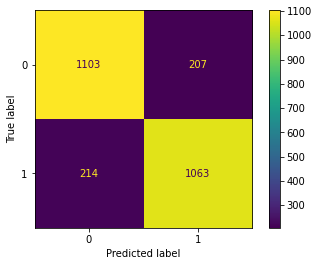

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

metricas.loc[0, 'matriz_confusao'].plot()

- **(0,0) Verdadeiros Negativos:** Acertou os não churn.
- **(0,1) Falsos Positivos:** Errou os churns, marcou como churn um não churn.
- **(1,0) Falsos Negativos:** Errou os churns, marcou como não churn um churn.
- **(1,1) Verdadeiros Positivos:** Acertou os churns

Além dos acertos, precisamos que os Falsos Negativos sem baixos! [Fonte](https://cursos.alura.com.br/course/modelos-preditivos-dados-deteccao-fraude/task/106629)


#### Avaliando Árvore de Decisão

In [27]:
metricas.query("classificador == 'DecisionTreeClassifier'")

,classificador,acuracia,precisao,recall,f1,auc,matriz_confusao
1,DecisionTreeClassifier,0.802474,0.773181,0.848865,0.809257,0.877435,<sklearn.metrics._plot.confusion_matrix.Confus...


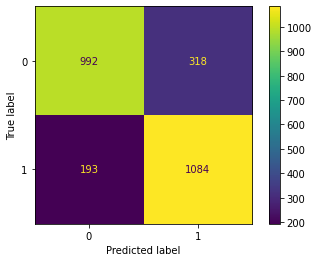

In [28]:
metricas.loc[1, 'matriz_confusao'].plot()

#### Avaliando Random Forest

In [29]:
metricas.query("classificador == 'RandomForestClassifier'")

,classificador,acuracia,precisao,recall,f1,auc,matriz_confusao
2,RandomForestClassifier,0.81407,0.779102,0.870008,0.82205,0.884849,<sklearn.metrics._plot.confusion_matrix.Confus...


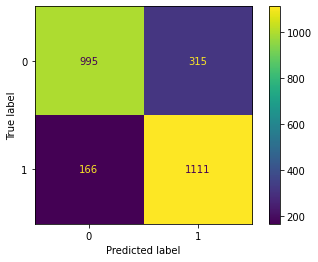

In [30]:
metricas.loc[2, 'matriz_confusao'].plot()

#### Avaliando SVM

In [31]:
metricas.query("classificador == 'SVC'")

,classificador,acuracia,precisao,recall,f1,auc,matriz_confusao
3,SVC,0.664863,0.676117,0.616288,0.644818,0.744178,<sklearn.metrics._plot.confusion_matrix.Confus...


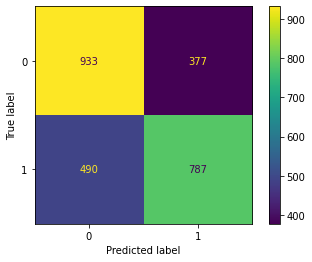

In [32]:
metricas.loc[3, 'matriz_confusao'].plot()

#### Conclusão sobre os modelos

In [33]:
metricas

,classificador,acuracia,precisao,recall,f1,auc,matriz_confusao
0,LogisticRegression,0.837263,0.837008,0.832420,0.834707,0.925903,<sklearn.metrics._plot.confusion_matrix.Confus...
1,DecisionTreeClassifier,0.802474,0.773181,0.848865,0.809257,0.877435,<sklearn.metrics._plot.confusion_matrix.Confus...
2,RandomForestClassifier,0.814070,0.779102,0.870008,0.822050,0.884849,<sklearn.metrics._plot.confusion_matrix.Confus...
3,SVC,0.664863,0.676117,0.616288,0.644818,0.744178,<sklearn.metrics._plot.confusion_matrix.Confus...


### Escolher o melhor modelo

Inicialmente o modelo LogisticRegression apresentou melhores resultados mas ainda trás um recall abaixo em relação ao RandomForestClassifier.

Não tive sucesso na melhoria do LogisticRegression, dessa forma vou passar ao modelo RandomForestClassifier

#### Hiperparâmetros que podem ser melhorados

In [34]:
n_estimators = np.arange(100, 200, step=20)
criterion = ["gini", "entropy", 'log_loss']  
max_features = ["sqrt", "log2", None]
max_depth = list(np.arange(2, 10, step=2))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    #"min_samples_split": min_samples_split,
    #"min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap
}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
random_cv = GridSearchCV(
    rf, parameters, cv=3, scoring="recall", n_jobs=-1
)

In [37]:
%%time
rf_boost = random_cv.fit(x_train, y_train)

## Alguns erros são esperados pois há dependências de parâmetros, exemplo, o solver newton-cg só funciona com o penalty l2 ou None

Wall time: 3min 20s


In [38]:
pd.DataFrame(rf_boost.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.222473,0.014906,0.025159,0.003289,True,gini,2,sqrt,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.851424,0.843726,0.871440,0.855530,0.011681,305
1,0.245598,0.012602,0.025104,0.000823,True,gini,2,sqrt,120,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.855273,0.842956,0.876059,0.858096,0.013661,295
2,0.265215,0.006249,0.028144,0.000790,True,gini,2,sqrt,140,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.862202,0.846805,0.877598,0.862202,0.012571,279
3,0.310385,0.010008,0.033332,0.001290,True,gini,2,sqrt,160,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.854503,0.846805,0.873749,0.858353,0.011331,294
4,0.332665,0.002624,0.034347,0.001193,True,gini,2,sqrt,180,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.856813,0.846035,0.875289,0.859379,0.012080,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1.637645,0.014639,0.029968,0.000076,False,log_loss,8,None,100,"{'bootstrap': False, 'criterion': 'log_loss', ...",0.882987,0.869900,0.839877,0.864255,0.018047,269
356,1.965018,0.022865,0.034675,0.001232,False,log_loss,8,None,120,"{'bootstrap': False, 'criterion': 'log_loss', ...",0.882987,0.869900,0.839877,0.864255,0.018047,269
357,2.279022,0.017002,0.040635,0.000524,False,log_loss,8,None,140,"{'bootstrap': False, 'criterion': 'log_loss', ...",0.882217,0.869900,0.839877,0.863998,0.017782,277
358,2.610269,0.033570,0.045023,0.000894,False,log_loss,8,None,160,"{'bootstrap': False, 'criterion': 'log_loss', ...",0.882987,0.869900,0.839877,0.864255,0.018047,269


In [39]:
rf_boost.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 100}

In [40]:
%%time
rf_cv = RandomForestClassifier(**rf_boost.best_params_, random_state=SEED)

classificadores = [lr, dt, rf, svc, rf_cv]

for idx, clf in enumerate(classificadores):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metricas.loc[idx, 'classificador'] = clf.__class__.__name__
    metricas.loc[idx, 'acuracia'] = metrics.accuracy_score(y_test, y_pred)
    metricas.loc[idx, 'precisao'] = metrics.precision_score(y_test, y_pred)
    metricas.loc[idx, 'recall'] = metrics.recall_score(y_test, y_pred)
    metricas.loc[idx, 'f1'] = metrics.f1_score(y_test, y_pred)
    y_pred_proba = clf.predict_proba(x_test)[::, 1]
    metricas.loc[idx, 'auc'] = metrics.roc_auc_score(y_test, y_pred_proba)    
    cm = confusion_matrix(y_test, y_pred)
    metricas.loc[idx, 'matriz_confusao'] = ConfusionMatrixDisplay(confusion_matrix=cm)

Wall time: 19.3 s


In [41]:
metricas.loc[[2, 4]]

,classificador,acuracia,precisao,recall,f1,auc,matriz_confusao
2,RandomForestClassifier,0.81407,0.779102,0.870008,0.82205,0.884849,<sklearn.metrics._plot.confusion_matrix.Confus...
4,RandomForestClassifier,0.75029,0.679567,0.935004,0.78708,0.816220,<sklearn.metrics._plot.confusion_matrix.Confus...


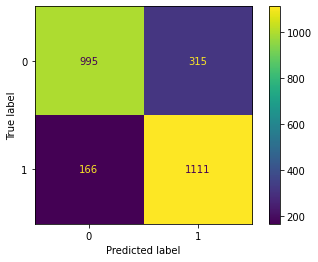

In [42]:
metricas.loc[2, 'matriz_confusao'].plot()

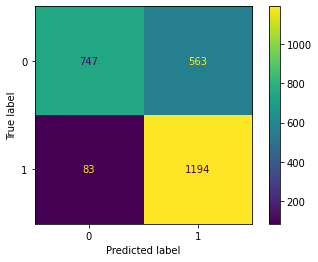

In [43]:
metricas.loc[4, 'matriz_confusao'].plot()

### Analisando o novo modelo

Apesar de as métricas terem **apenas** melhorado na acurácia proposta (recall), vejo que o modelo está aceitável pois teve uma melhora na definição dos **Verdadeiros Positivos** (marcação de churn em quem é churn), uma grande melhora (100% relativamente) na identificação dos **Falso Negativo** (marcação de não churn em quem é churn), uma queda no **Falso Positivo** mas que na verdade se desloca para o **Falso Negativo**.

Inicialmente não vejo esse deslocamento ruim ao processo. Significa que, ao invés de cravar que o cliente não será churn eu vou dizer que ele será (mesmo não sendo).

### Testando o novo modelo

No ínicio do processe de limpeza de dados, haviam registros em que a flag de churn estava vazia. Vamos aproveitar o modelo e classificar estes clientes

In [44]:
dados_pred = pd.read_json('../Dados/dados_tratados.json')
dados_pred.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,tipo_servico_internet,...,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,fl_servico_tv_cabo,fl_servico_stream,tipo_contrato,fl_sem_papel,valor_servico_diario,tipo_pagamento,valor_servico_mensal,valor_servico_total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,2.19,Cheque (Correios),65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,2.00,Cheque (Correios),59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mensal,Sim,2.46,Cheque (Eletrônico),73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra ótica,...,Sim,Não,Sim,Sim,Mensal,Sim,3.27,Cheque (Eletrônico),98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra ótica,...,Não,Sim,Sim,Não,Mensal,Sim,2.80,Cheque (Correios),83.9,267.40


In [45]:
dados_pred.fl_inativo.isnull().sum()

224

In [46]:
dados_pred = dados_pred[dados_pred.fl_inativo.isnull()]
dados_pred.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,tipo_servico_internet,...,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,fl_servico_tv_cabo,fl_servico_stream,tipo_contrato,fl_sem_papel,valor_servico_diario,tipo_pagamento,valor_servico_mensal,valor_servico_total
30,0047-ZHDTW,None,Feminino,Não,Não,Não,11,Sim,Sim,Fibra ótica,...,Não,Não,Não,Não,Mensal,Sim,2.63,Transferência Bancária,79.00,929.30
75,0120-YZLQA,None,Masculino,Não,Não,Não,71,Sim,Não,Nenhum,...,Não,Não,Não,Não,Bienal,Sim,0.66,Cartão de Crédito,19.90,1355.10
96,0154-QYHJU,None,Masculino,Não,Não,Não,29,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,Sim,1.96,Cheque (Eletrônico),58.75,1696.20
98,0162-RZGMZ,None,Feminino,Sim,Não,Não,5,Sim,Não,DSL,...,Não,Sim,Não,Não,Mensal,Não,2.00,Cartão de Crédito,59.90,287.85
175,0274-VVQOQ,None,Masculino,Sim,Sim,Não,65,Sim,Sim,Fibra ótica,...,Sim,Não,Sim,Sim,Anual,Sim,3.44,Transferência Bancária,103.15,6792.45


Vou precisar fazer o mesmo tratamento que fiz nas bases

#### Tradução dos dados

In [47]:
sim_nao = {'Sim': 1, 'Não': 0}
colunas = dados_pred.filter(like='fl_').columns
for coluna in colunas:
    dados_pred[coluna].replace(sim_nao, inplace=True)
dados_pred.head()

,id_cliente,fl_inativo,sexo,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,tipo_servico_internet,...,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,fl_servico_tv_cabo,fl_servico_stream,tipo_contrato,fl_sem_papel,valor_servico_diario,tipo_pagamento,valor_servico_mensal,valor_servico_total
30,0047-ZHDTW,None,Feminino,0,0,0,11,1,1,Fibra ótica,...,0,0,0,0,Mensal,1,2.63,Transferência Bancária,79.00,929.30
75,0120-YZLQA,None,Masculino,0,0,0,71,1,0,Nenhum,...,0,0,0,0,Bienal,1,0.66,Cartão de Crédito,19.90,1355.10
96,0154-QYHJU,None,Masculino,0,0,0,29,1,0,DSL,...,0,1,0,0,Anual,1,1.96,Cheque (Eletrônico),58.75,1696.20
98,0162-RZGMZ,None,Feminino,1,0,0,5,1,0,DSL,...,0,1,0,0,Mensal,0,2.00,Cartão de Crédito,59.90,287.85
175,0274-VVQOQ,None,Masculino,1,1,0,65,1,1,Fibra ótica,...,1,0,1,1,Anual,1,3.44,Transferência Bancária,103.15,6792.45


#### Separação das colunas (Encoder)

In [48]:
dados_pred = pd.get_dummies(data=dados_pred, columns=['tipo_servico_internet', 'tipo_contrato', 'tipo_pagamento'])

In [49]:
colunas_nome = {
    'tipo_servico_internet_DSL': 'fl_servico_internet_dsl', 
    'tipo_servico_internet_Fibra ótica': 'fl_servico_internet_fibra_otica',
    'tipo_servico_internet_Nenhum': 'fl_sem_servico_internet', 
    'tipo_contrato_Anual': 'fl_contrato_anual',
    'tipo_contrato_Bienal': 'fl_contrato_bienal', 
    'tipo_contrato_Mensal': 'fl_contrato_mensal',
    'tipo_pagamento_Cartão de Crédito': 'fl_pagamento_ccredito',
    'tipo_pagamento_Cheque (Correios)': 'fl_pagamento_cheque_correio',
    'tipo_pagamento_Cheque (Eletrônico)': 'fl_pagamento_cheque_eletronico',
    'tipo_pagamento_Transferência Bancária': 'fl_pagamento_transf_bancaria'
}
dados_pred.rename(columns=colunas_nome, inplace=True)

In [50]:
x_avaliar = dados_pred.drop(columns=['id_cliente', 'sexo', 'valor_servico_diario', 'fl_inativo'])

In [51]:
y_avaliar = rf_cv.predict(x_avaliar)

[Text(0, 0, '94'), Text(0, 0, '130')]

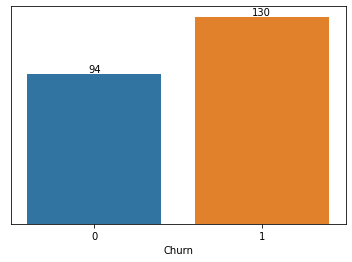

In [65]:
ax = sns.countplot(x=y_avaliar)
ax.get_yaxis().set_visible(False)
plt.xlabel('Churn')
ax.bar_label(container = ax.containers[0])

58% da base está marcada como Churn

In [53]:
dados_pred_avaliar = x_avaliar

In [54]:
dados_pred_avaliar['fl_inativo'] = y_avaliar

In [55]:
dados_pred_avaliar

,fl_maior_65_anos,fl_tem_parceiro,fl_dependentes,meses_contrato,fl_servico_telefonico,fl_multiplas_linhas,fl_servico_seguranca_online,fl_servico_backup_online,fl_servico_protecao_dispositivo,fl_servico_suporte_tech,...,fl_servico_internet_fibra_otica,fl_sem_servico_internet,fl_contrato_anual,fl_contrato_bienal,fl_contrato_mensal,fl_pagamento_ccredito,fl_pagamento_cheque_correio,fl_pagamento_cheque_eletronico,fl_pagamento_transf_bancaria,fl_inativo
30,0,0,0,11,1,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1
75,0,0,0,71,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
96,0,0,0,29,1,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
98,1,0,0,5,1,0,1,1,0,1,...,0,0,0,0,1,1,0,0,0,1
175,1,1,0,65,1,1,0,1,1,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,0,0,0,14,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
7180,0,1,0,49,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
7211,0,0,0,9,1,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
7239,0,1,1,67,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


#### Testando as hipóteses

Haviamos levanto a questão de que o churn estava atrelado a contrato mensal, fibra ótica, cheque eletrônico e meses de contrato baixos 

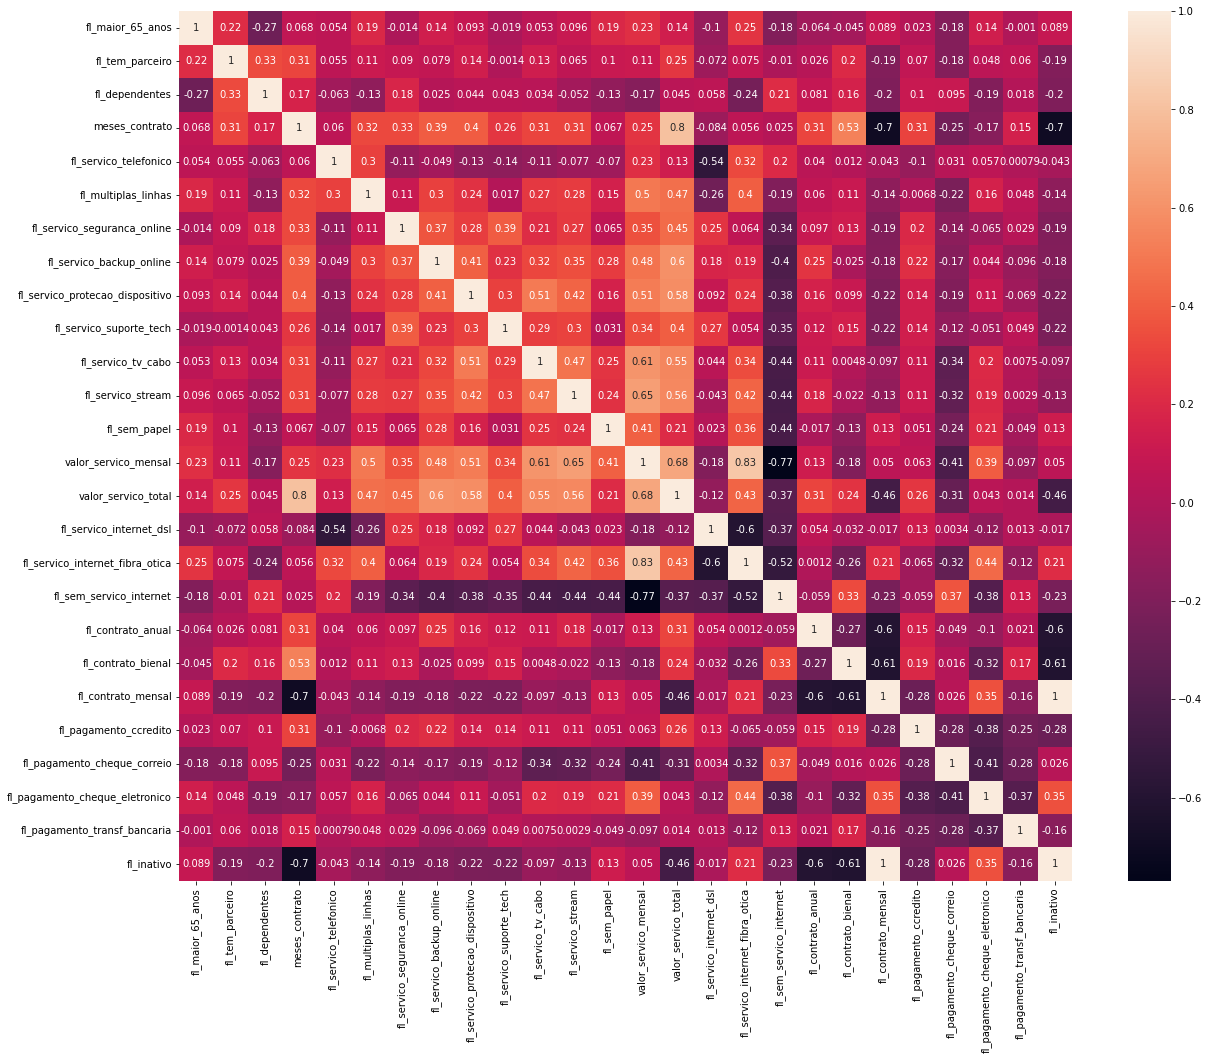

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 16))

sns.heatmap(dados_pred_avaliar.corr(), annot=True)
plt.show()

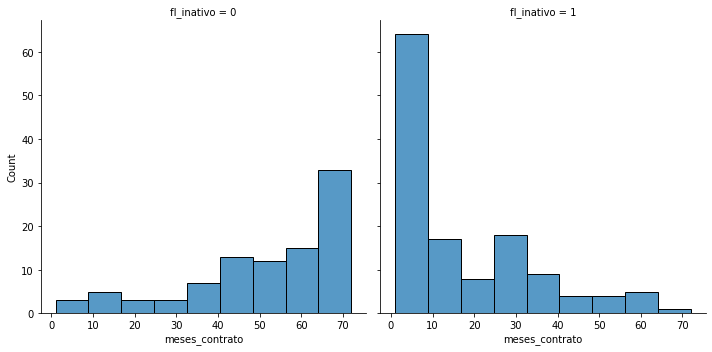

In [72]:
sns.displot(dados_pred_avaliar, x='meses_contrato', col='fl_inativo');

In [76]:
pd.crosstab(index = dados_pred_avaliar.fl_inativo, columns = dados_pred_avaliar.fl_contrato_mensal, normalize = 'index') * 100

fl_contrato_mensal,0,1
fl_inativo,,
0,100.0,0.0
1,0.0,100.0


In [80]:
pd.crosstab(index = dados_pred_avaliar.fl_inativo, columns = dados_pred_avaliar.fl_servico_internet_fibra_otica, normalize = 'index') * 100

fl_servico_internet_fibra_otica,0,1
fl_inativo,,
0,67.021277,32.978723
1,45.384615,54.615385


In [81]:
pd.crosstab(index = dados_pred_avaliar.fl_inativo, columns = dados_pred_avaliar.fl_pagamento_cheque_eletronico, normalize = 'index') * 100

fl_pagamento_cheque_eletronico,0,1
fl_inativo,,
0,84.042553,15.957447
1,50.000000,50.000000


In [78]:
dados_pred_avaliar.query("fl_inativo == 1").fl_contrato_mensal.value_counts()

1    130
Name: fl_contrato_mensal, dtype: int64

O modelo quando testado sob uma potencial base de clientes, que não tenha sido nem a de treino nem a de teste, **não apresentou um resultado satisfatório**.

A generalização dos clientes com contrato mensal foi o resultado mais impactante nesta análise. O modelo pode ter sofrido um _overfit_ que o fez realizar essa marcação generalizada.

O modelo peca pelo excesso. Não é o ideal mas nem tudo está perdido.
